In [71]:
import pandas as pd
df = pd.read_csv("C:\\Users\Mohamed\\Downloads\\kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


MSE 66888607392.21244
R squared 0.49898688967814864


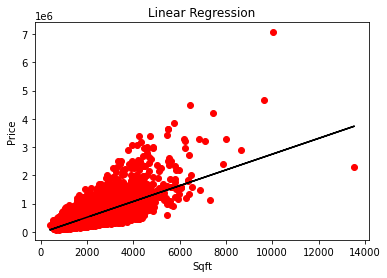

In [25]:
import  matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x =df["sqft_living"].values.reshape(-1,1)
y =df["price"].values
x_train,x_test,y_train,y_test= train_test_split (x ,y , test_size=0.35 , random_state=20)

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

plt.scatter(x_test,y_test,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Sqft")
plt.plot(x_test,model.predict(x_test),color="k")
plt.show()

MSE 182841580294.8415
R squared 0.2240272258178324


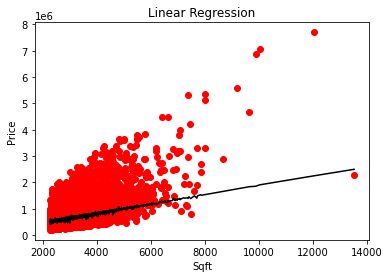

--Return--
None
> <ipython-input-63-a18ca55dfcf0>(24)<module>()
     22 df_display = pd.DataFrame({"sqft_living":x_test[:,0],"bedrooms": x_test[:,1], "price": y_test})
     23 df_display = df_display.sort_values(by=["bedrooms"])
---> 24 import pdb;pdb.set_trace()
     25 plt.scatter(df_display["bedrooms"].values.reshape(-1, 1),df_display["price"],color="r")
     26 plt.title("Linear Regression")

ipdb> c


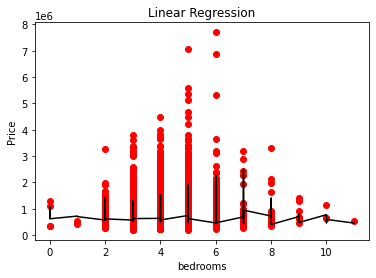

In [63]:
x =df[["sqft_living","bedrooms"]].values
y =df["price"].values

df =df.sort_values(by=["sqft_living","price"] )
x_train,x_test,y_train,y_test= train_test_split (x ,y , test_size=0.35 , random_state=20 , shuffle = False)

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))


plt.scatter(x_test[:,0],y_test,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Sqft")
plt.plot(x_test[:,0],model.predict(x_test),color="k")
plt.show()

df_display = pd.DataFrame({"sqft_living":x_test[:,0],"bedrooms": x_test[:,1], "price": y_test})
df_display = df_display.sort_values(by=["bedrooms"])

plt.scatter(df_display["bedrooms"].values.reshape(-1, 1),df_display["price"],color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("bedrooms")
plt.plot(df_display["bedrooms"].values.reshape(-1, 1),model.predict(df_display[["sqft_living","bedrooms"]].values),color="k")
plt.show()

In [65]:
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error
from sklearn import metrics
x= df[["sqft_living", "bedrooms"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  61552777344.75696
R squared:  0.5502081899064095


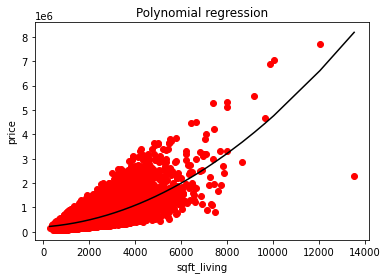

In [69]:
x= df["sqft_living"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Polynomial regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

 

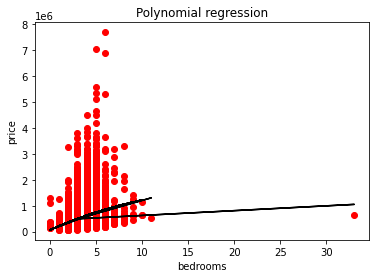

In [70]:
x= df["bedrooms"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Polynomial regression")
plt.ylabel("price")
plt.xlabel("bedrooms")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k")